# Data Description 

By: Jimuel Celeste, Jr. 

Objective: To describe the datasets for internal cross-validation and external validation.

In [1]:
import datetime
import os

import librosa
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

In [2]:
sns.set_context('talk')
sns.set_style('ticks')

## Internal Cross-Validation Set

In [3]:
# sample metadata filesfrom eGeMAPS
# all metadata files in the feature set directories are identical
input_dir = '/Users/jimuelcelestejr/Downloads/Dataset/Thesis - Features/Thesis - Acoustic Features/egemaps_functionals'
internal_cv = os.path.join(input_dir, 'metadata_cv_english.csv')
internal_cv = pd.read_csv(internal_cv)
internal_cv.head()

,filename,record_id,subject_id,age,sex,educ,mmse,dx,dx_binary,dataset,language
0,S002.csv,S002,S002,62.0,F,NaN,30.0,NC,0,ADReSS,en
1,S003.csv,S003,S003,69.0,F,NaN,29.0,NC,0,ADReSS,en
2,S004.csv,S004,S004,71.0,F,NaN,30.0,NC,0,ADReSS,en
3,S005.csv,S005,S005,74.0,F,NaN,30.0,NC,0,ADReSS,en
4,S006.csv,S006,S006,67.0,F,NaN,29.0,NC,0,ADReSS,en


In [4]:
internal_cv.shape

(462, 11)

### Language

In [5]:
internal_cv['language'].value_counts()

language
en    462
Name: count, dtype: int64

All samples are English.

### Total Participants

In [6]:
len(internal_cv['subject_id'].unique()), internal_cv.shape

(462, (462, 11))

One participant to one sample.

### Sex Distribution

In [7]:
internal_cv['sex'].value_counts()

sex
F    240
M    151
Name: count, dtype: int64

In [8]:
internal_cv['sex'].isna().sum()

71

240 women; 151 men; 71 missing

### Age Distirbution

In [9]:
def get_distribution(df):
    mean = df.mean()
    std = df.std()
    minimum = df.min()
    maximum = df.max()
    return "%.2f (±%.2f, %i-%i)" % (mean, std, minimum, maximum)

print('Age', get_distribution(internal_cv['age']))
print('Women', get_distribution(internal_cv[internal_cv['sex']=='F']['age']))
print('Men', get_distribution(internal_cv[internal_cv['sex']=='M']['age']))
print('Missing', internal_cv['age'].isna().sum())

Age 67.20 (±6.79, 50-80)
Women 67.39 (±6.45, 54-79)
Men 66.89 (±7.31, 50-80)
Missing 71


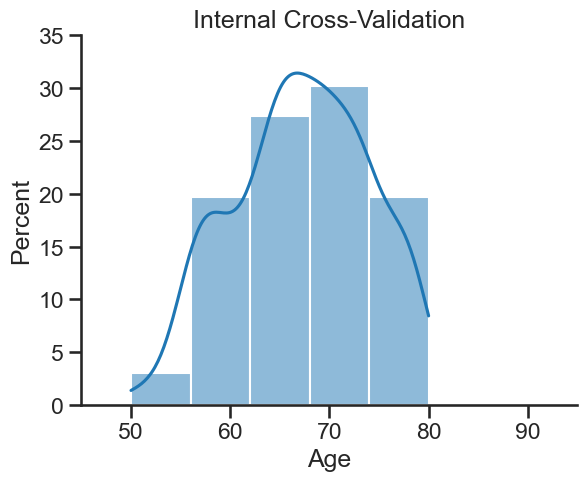

In [10]:
output_dir = '/Users/jimuelcelestejr/Downloads/Dataset/Thesis - Figures/Datasets'

plt.figure()
sns.histplot(internal_cv['age'], stat='percent', bins=5, kde=True)
plt.title('Internal Cross-Validation')
plt.xlabel('Age')
plt.xlim(45,95)
plt.ylim(0,35)
sns.despine()

output_file = os.path.join(output_dir, 'Internal Cross-Validation.png')
plt.savefig(output_file, dpi=300, bbox_inches='tight', transparent=True)

### MMSE

In [11]:
print('MMSE', get_distribution(internal_cv['mmse']))
print('AD/Probable AD', get_distribution(internal_cv[internal_cv['dx_binary']==1]['mmse']))
print('HC', get_distribution(internal_cv[internal_cv['dx_binary']==0]['mmse']))

MMSE 23.38 (±6.81, 1-30)
AD/Probable AD 17.98 (±5.53, 1-30)
HC 28.96 (±1.19, 24-30)


### Duration of Recordings

In [12]:
def csv_to_wav(file):
    base, ext = os.path.splitext(file)
    return base + '.wav'

def csv_to_mp3(file):
    base, ext = os.path.splitext(file)
    return base + '.mp3'
    
def get_duration(audio_file):
    y, sr = librosa.load(audio_file)
    return librosa.get_duration(y=y, sr=sr)

def get_duration_arr(df, input_dir_audio):
    duration_arr = []

    files = df['filename']
    n = len(files)
    i = 1
    for file in files:
        input_file = os.path.join(input_dir_audio, file) 
        
        if os.path.exists(csv_to_wav(input_file)):
            duration = get_duration(csv_to_wav(input_file))
            duration_arr.append(duration)
            # print(f"{i} / {n}: {file}, {duration}")
            i += 1
        elif os.path.exists(csv_to_mp3(input_file)):
            duration = get_duration(csv_to_mp3(input_file))
            duration_arr.append(duration)
            # print(f"{i} / {n}: {file}, {duration}")
            i += 1
        else:
            print("Error processing", file)
            raise Exception('Duration calculation failed')
    
    duration_df = pd.DataFrame(duration_arr, columns=['duration'])['duration']
    return duration_df

def get_distribution_timedelta(df):
    mean = df.mean()
    std = df.std()
    minimum = df.min()
    maximum = df.max()

    print("Mean", datetime.timedelta(seconds=mean))
    print("Std", datetime.timedelta(seconds=std))
    print("Min", datetime.timedelta(seconds=minimum))
    print("Max", datetime.timedelta(seconds=maximum))

def get_distribution_timedelta_minutes(df):
    mean = df.mean()
    std = df.std()
    minimum = df.min()
    maximum = df.max()
    
    return "%.2f (±%.2f, %i-%i)" % (mean/60, std/60, minimum/60, maximum/60)


In [13]:
input_dir_audio = '/Users/jimuelcelestejr/Downloads/Dataset/Thesis - Data/Thesis - Combined'
duration = get_duration_arr(internal_cv, input_dir_audio)
get_distribution(duration)

'75.67 (±37.21, 22-268)'

In [14]:
duration_probable_ad = get_duration_arr(internal_cv[internal_cv['dx_binary']==1], input_dir_audio)
get_distribution(duration_probable_ad)

'84.23 (±43.64, 28-268)'

In [15]:
duration_hc = get_duration_arr(internal_cv[internal_cv['dx_binary']==0], input_dir_audio)
get_distribution(duration_hc)

'66.82 (±26.41, 22-168)'

## External Validation Sets

In [16]:
metadata_files = {
    'External Validation (English, control)' : 'metadata_ev_english_control.csv',   
    'External Validation (English)': 'metadata_ev_english.csv',
    'External Validation (Chinese)': 'metadata_ev_chinese.csv',
    'External Validation (Greek)': 'metadata_ev_greek.csv'
}

In [17]:
metadata_df = {}
for file in metadata_files:
    metadata_csv = os.path.join(input_dir, metadata_files[file])
    metadata = pd.read_csv(metadata_csv)
    metadata_df[file] = metadata
# metadata_df

### Language

In [18]:
for file in metadata_df:
    metadata = metadata_df[file]
    print(file)
    print(metadata['language'].value_counts())

External Validation (English, control)
language
en    82
Name: count, dtype: int64
External Validation (English)
language
en    164
Name: count, dtype: int64
External Validation (Chinese)
language
zh    261
Name: count, dtype: int64
External Validation (Greek)
language
el    54
Name: count, dtype: int64


### Total Participants

In [19]:
for file in metadata_df:
    metadata = metadata_df[file]
    print(file)
    print(len(metadata['subject_id'].unique()), metadata.shape)

External Validation (English, control)
82 (82, 11)
External Validation (English)
82 (164, 11)
External Validation (Chinese)
87 (261, 11)
External Validation (Greek)
54 (54, 11)


### Sex Distribution

of unique ids

In [20]:
for file in metadata_df:
    metadata = metadata_df[file]
    print(file)
    print(metadata.drop_duplicates('subject_id')['sex'].value_counts())
    print(metadata.drop_duplicates('subject_id')['sex'].isna().sum())

External Validation (English, control)
sex
F    55
M    27
Name: count, dtype: int64
0
External Validation (English)
sex
F    55
M    27
Name: count, dtype: int64
0
External Validation (Chinese)
sex
F    46
M    41
Name: count, dtype: int64
0
External Validation (Greek)
sex
F    41
M    13
Name: count, dtype: int64
0


### Age Distribution

In [21]:
for file in metadata_df:
    metadata = metadata_df[file].drop_duplicates('subject_id')
    print(file, metadata.shape)
    print('\tAge', get_distribution(metadata['age']))
    print('\tWomen', get_distribution(metadata[metadata['sex']=='F']['age']))
    print('\tMen', get_distribution(metadata[metadata['sex']=='M']['age']))
    print('\tMissing', metadata['age'].isna().sum())

External Validation (English, control) (82, 11)
	Age 71.59 (±7.39, 61-91)
	Women 70.84 (±7.28, 61-91)
	Men 73.11 (±7.53, 61-88)
	Missing 0
External Validation (English) (82, 11)
	Age 71.59 (±7.39, 61-91)
	Women 70.84 (±7.28, 61-91)
	Men 73.11 (±7.53, 61-88)
	Missing 0
External Validation (Chinese) (87, 11)
	Age 73.94 (±6.64, 59-89)
	Women 74.02 (±5.58, 63-84)
	Men 73.85 (±7.74, 59-89)
	Missing 0
External Validation (Greek) (54, 11)
	Age 69.37 (±7.79, 52-86)
	Women 69.88 (±7.51, 60-86)
	Men 67.77 (±8.76, 52-82)
	Missing 0


External Validation (English, control) (82, 11)
External Validation (English) (82, 11)
External Validation (Chinese) (87, 11)
External Validation (Greek) (54, 11)


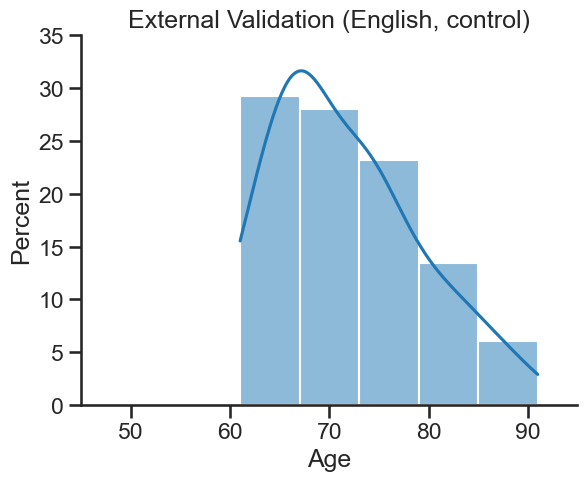

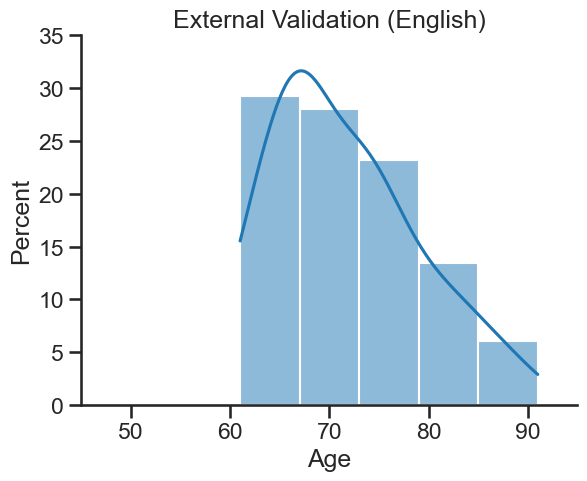

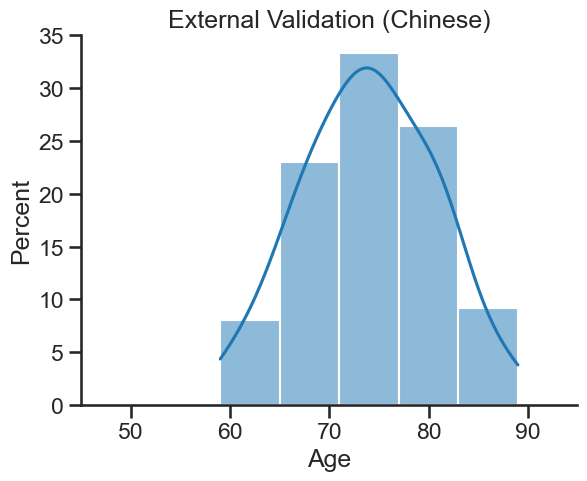

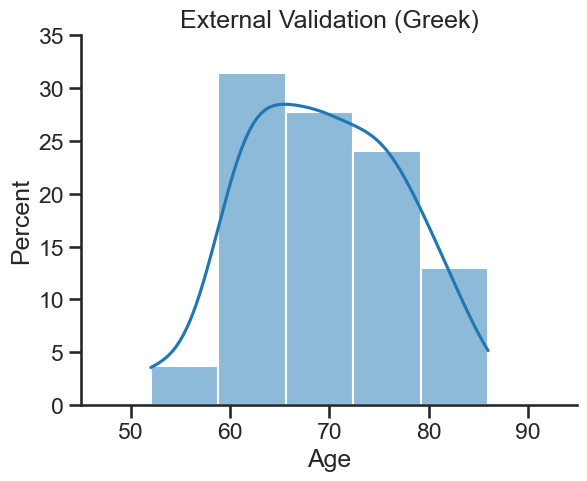

In [22]:
for file in metadata_df:
    metadata = metadata_df[file].drop_duplicates('subject_id')
    print(file, metadata.shape)

    plt.figure()
    sns.histplot(metadata['age'], stat='percent', bins=5, kde=True)
    plt.title(file)
    plt.xlabel('Age')
    plt.xlim(45,95)
    plt.ylim(0,35)
    sns.despine()

    output_file = os.path.join(output_dir, file + '.png')
    plt.savefig(output_file, dpi=300, bbox_inches='tight', transparent=True)

### MMSE

In [23]:
for file in metadata_df:
    metadata = metadata_df[file].drop_duplicates('subject_id')
    print(file, metadata.shape)
    print('\tMMSE', get_distribution(metadata['mmse']))
    print('\tAD/Probable AD', get_distribution(metadata[metadata['dx_binary']==1]['mmse']))
    print('\tHC', get_distribution(metadata[metadata['dx_binary']==0]['mmse']))

External Validation (English, control) (82, 11)
	MMSE 28.28 (±1.28, 25-30)
	AD/Probable AD 27.69 (±1.22, 25-30)
	HC 29.26 (±0.58, 28-30)
External Validation (English) (82, 11)
	MMSE 28.28 (±1.28, 25-30)
	AD/Probable AD 27.69 (±1.22, 25-30)
	HC 29.26 (±0.58, 28-30)
External Validation (Chinese) (87, 11)
	MMSE 26.29 (±4.13, 13-30)
	AD/Probable AD 23.70 (±4.31, 13-30)
	HC 28.93 (±1.32, 25-30)
External Validation (Greek) (54, 11)
	MMSE 25.19 (±5.08, 12-30)
	AD/Probable AD 21.12 (±4.48, 12-27)
	HC 28.96 (±1.10, 26-30)


### Total Samples

In [24]:
for file in metadata_df:
    metadata = metadata_df[file]
    print(file)
    print('\tRecords', len(metadata), metadata.shape)
    print('\tWomen', len(metadata[metadata['sex']=='F']), metadata.shape)
    print('\tWomen', len(metadata[metadata['sex']=='M']), metadata.shape)
    print('\tMissing', len(metadata[metadata['sex'].isna()]), metadata.shape)

External Validation (English, control)
	Records 82 (82, 11)
	Women 55 (82, 11)
	Women 27 (82, 11)
	Missing 0 (82, 11)
External Validation (English)
	Records 164 (164, 11)
	Women 110 (164, 11)
	Women 54 (164, 11)
	Missing 0 (164, 11)
External Validation (Chinese)
	Records 261 (261, 11)
	Women 138 (261, 11)
	Women 123 (261, 11)
	Missing 0 (261, 11)
External Validation (Greek)
	Records 54 (54, 11)
	Women 41 (54, 11)
	Women 13 (54, 11)
	Missing 0 (54, 11)


### Recording Duration

In [25]:
for file in metadata_df:
    metadata = metadata_df[file]
    print(file)
    
    duration = get_duration_arr(metadata, input_dir_audio)
    print("\tOverall", get_distribution(duration))
    
    duration_probable_ad = get_duration_arr(metadata[metadata['dx_binary']==1], input_dir_audio)
    print("\tAD/Probable AD", get_distribution(duration_probable_ad))
    
    duration_hc = get_duration_arr(metadata[metadata['dx_binary']==0], input_dir_audio)
    print("\tHC", get_distribution(duration_hc))

External Validation (English, control)
	Overall 48.18 (±34.66, 10-209)
	AD/Probable AD 45.74 (±30.19, 13-148)
	HC 52.20 (±41.20, 10-209)
External Validation (English)
	Overall 74.54 (±49.21, 14-257)
	AD/Probable AD 73.38 (±48.38, 18-257)
	HC 76.44 (±50.88, 14-253)
External Validation (Chinese)
	Overall 59.34 (±29.52, 12-154)
	AD/Probable AD 59.24 (±31.74, 12-153)
	HC 59.43 (±27.19, 17-154)
External Validation (Greek)
	Overall 38.03 (±20.29, 11-119)
	AD/Probable AD 40.69 (±15.81, 14-89)
	HC 35.57 (±23.74, 11-119)


## Re: Missing Data: Which dataset are the samples from?

In [26]:
internal_cv[internal_cv['sex'].isna()]['dataset'].value_counts()

dataset
ADReSSo    71
Name: count, dtype: int64

In [27]:
internal_cv[internal_cv['age'].isna()]['dataset'].value_counts()

dataset
ADReSSo    71
Name: count, dtype: int64

All from ADReSSo.